<a href="https://colab.research.google.com/github/tesyaeriana/PCVK_Semester-5/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Tesya Eriana**<br>
**Kelas: TI-3A**<br>
**NIM  : 2141720024**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**TUGAS PRAKTIKUM**

1. **Buat Gamma Correction sesuai dengan petunjuk berikut**<br>
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


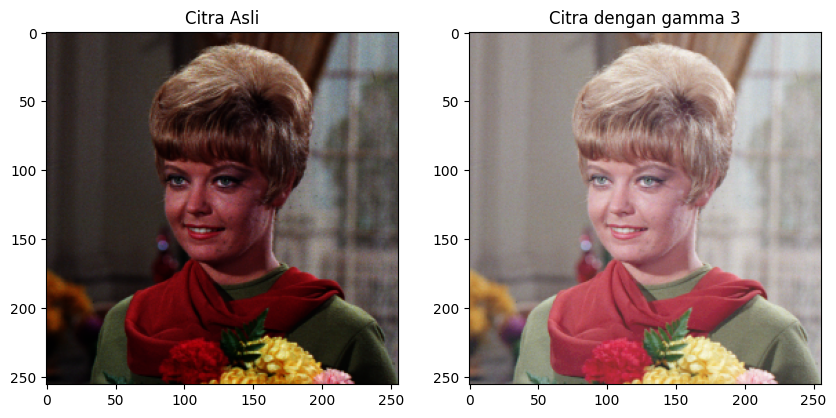

In [ ]:

import cv2 as cv
from google.colab.patches import cv2_imshow


import numpy as np
import matplotlib.pyplot as plt
print('Gamma Correction pada citra')
print('----------------------------------')

try:

    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:

    print('Error, bukan angka')
    exit()

nama_file_citra = '/content/drive/MyDrive/pcvk/female.tiff'
citra = cv.imread(nama_file_citra)

if citra is None:

    print(f'Error: Tidak dapat membaca citra {nama_file_citra}')
    exit()

gamma_corrected = np.power(citra / 255.0, 1.0 / gamma)
gamma_corrected = np.uint8(gamma_corrected * 255)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(citra, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title(f'Citra dengan gamma {gamma}')
plt.imshow(cv.cvtColor(gamma_corrected, cv.COLOR_BGR2RGB))
plt.axis('on')

# Menampilkan plot yang sudah dibuat
plt.show()


2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27
= 128, dst.Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.

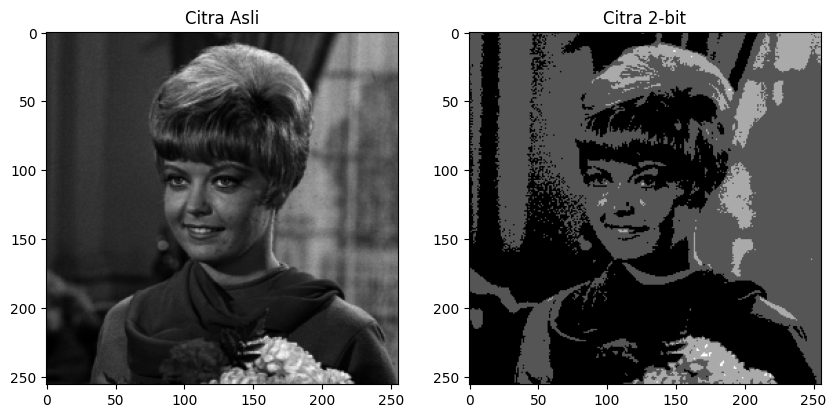

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

bit_depth=2
level = (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff', cv.IMREAD_GRAYSCALE)
# Membuat citra dengan kedalaman bit yang ditentukan
depth_image = np.zeros(original.shape, original.dtype)


# Melakukan proses kuantisasi citra
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        # Menghitung nilai kuantisasi sesuai dengan rumus
        quantized_value = round((original[i, j] / 255) * level) * (255 / level)
        depth_image[i, j] = quantized_value

# Menampilkan citra dengan kedalaman bit yang ditentukan bersebelahan
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(original, cmap='gray')
plt.axis('on')  # Tampilkan grid

plt.subplot(1, 2, 2)
plt.title(f'Citra {bit_depth}-bit')
plt.imshow(depth_image, cmap='gray')
plt.axis('on')  # Tampilkan grid

plt.show()

3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

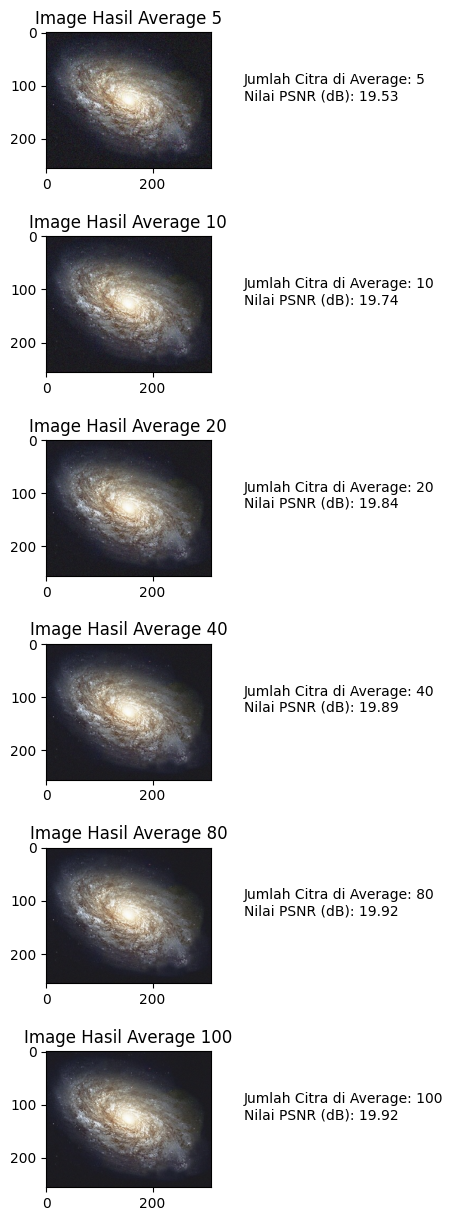

In [ ]:
# Import library yang dibutuhkan
import cv2 as cv
import numpy as np
import glob
from skimage.metrics import peak_signal_noise_ratio
from matplotlib import pyplot as plt

# Membaca citra asli
original_image = cv.imread('/content/drive/MyDrive/pcvk/galaxy.jpg')

# Membaca semua citra dengan Gaussian Noise dari folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/pcvk/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Fungsi untuk denoising rata-rata
def average_denoising(image_list):
    # Menghitung rata-rata citra-citra dengan Gaussian Noise
    average_image = np.zeros(image_list[0].shape, dtype=np.float32)
    for img in image_list:
        average_image += img / len(image_list)

    # Mengkonversi citra rata-rata ke tipe data yang benar
    average_image = average_image.astype(np.uint8)

    return average_image

# Menyiapkan tabel hasil PSNR dan citra hasil average
hasil_psnr = []

# Jumlah citra di Average Image
jumlah_citra_average_image = [5, 10, 20, 40, 80,100]

# Mencatat hasil PSNR dan citra hasil average
for jumlah_citra in jumlah_citra_average_image:
    # Memilih citra-citra dari cv_img sesuai jumlah_citra
    selected_images = cv_img[:jumlah_citra]

    # Menghilangkan noise dari citra-citra dengan Gaussian Noise
    denoised_image = average_denoising(selected_images)

    # Menghitung PSNR antara citra asli dan citra denoised
    psnr_value = peak_signal_noise_ratio(original_image, denoised_image)

    # Menambahkan hasil PSNR dan citra hasil average ke tabel
    hasil_psnr.append((jumlah_citra, psnr_value, denoised_image))

# Menampilkan tabel hasil PSNR dan citra hasil average dengan border
plt.figure(figsize=(10, 15))  # Increase figsize
for i, (jumlah_citra, psnr_value, avg_image) in enumerate(hasil_psnr):
    plt.subplot(len(hasil_psnr), 2, i * 2 + 1)  # 2 columns for image and info
    plt.imshow(cv.cvtColor(avg_image, cv.COLOR_BGR2RGB))
    plt.axis('on')
    plt.title(f'Image Hasil Average {jumlah_citra}')

    # Menampilkan informasi di sebelah kanan gambar
    info_text = f'Jumlah Citra di Average: {jumlah_citra}\nNilai PSNR (dB): {psnr_value:.2f}'
    plt.text(1.2, 0.5, info_text, fontsize=10, ha='left', transform=plt.gca().transAxes)

    # Add some space between images
    plt.subplots_adjust(hspace=0.5)

plt.show()

Kesimpulan: Dari percobaan diatas dengan memberikan nilai citra di average yang berbeda - beda dapat dilihat dan dibandingkan semakin besar nilai jumlah citra maka akan semakin jelas gambar dan semakin sedikit noise nya.

4. Buat image masking untuk image berikut. Image kiri adalah image asli (image KTP),
sedangkan image paling kanan adalah hasilnya:

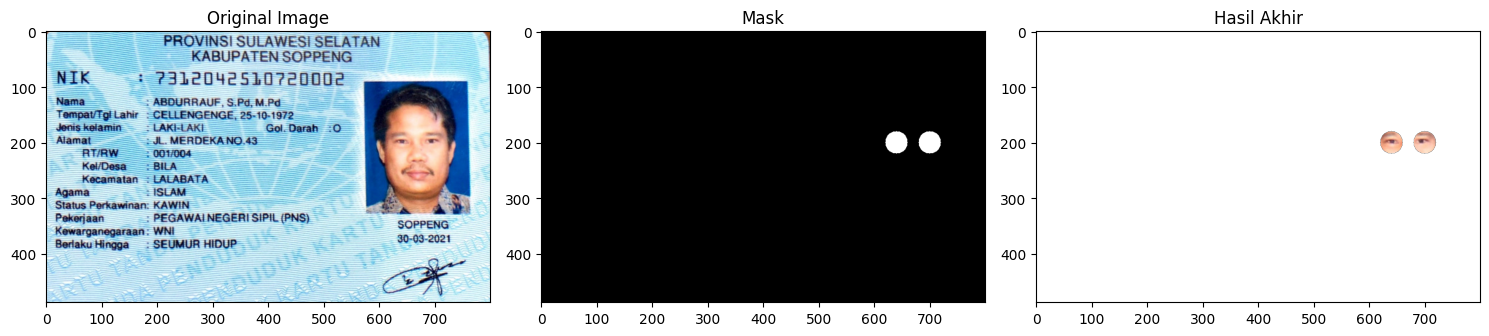

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar asli
image_path = '/content/drive/MyDrive/pcvk/ktp_bapaknya.jpg'
original_image = cv.imread(image_path)

# Membuat maska dengan dua lingkaran putih
mask = np.zeros(original_image.shape[:2], dtype="uint8")
cv.circle(mask, (640, 200), 20, 255, -1)
cv.circle(mask, (700, 200), 20, 255, -1)

# Menggunakan operasi bitwise untuk mendapatkan bagian gambar yang ada di dalam maska
masked = cv.bitwise_and(original_image, original_image, mask=mask)

# Mengonversi gambar menjadi grayscale
tmp = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)

# Menggunakan teknik thresholding
_, alpha = cv.threshold(tmp, 0, 255, cv.THRESH_BINARY)

# Memisahkan saluran warna Red, Green, Blue dari gambar asli
b, g, r = cv.split(masked)

# Membuat list yang berisi saluran warna Red, Green, Blue, dan saluran alpha
rgba = [b, g, r, alpha]

# Menggunakan cv.merge() untuk menggabungkan keempat saluran ke dalam gambar RGBA
final = cv.merge(rgba)

# Menampilkan gambar samping-sampingan menggunakan matplotlib
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(131)
plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

# Maska
plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('on')

# Hasil akhir dengan latar belakang transparan
plt.subplot(133)
plt.imshow(cv.cvtColor(final, cv.COLOR_BGRA2RGBA))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar asli
image_path = '/content/drive/MyDrive/pcvk/ktp_bapaknya.jpg'
original_image = cv.imread(image_path)

# Membuat maska dengan dua lingkaran putih
mask = np.zeros(original_image.shape[:2], dtype="uint8")
cv.circle(mask, (640, 200), 20, 255, -1)
cv.circle(mask, (700, 200), 20, 255, -1)

# Menggunakan operasi bitwise AND untuk mendapatkan bagian gambar yang ada di dalam maska
masked = cv.bitwise_and(original_image, original_image, mask=mask)
# Operasi bitwise OR
bitwise_or = cv.bitwise_or(original_image, original_image, mask=mask)
# Operasi bitwise NOT
bitwise_not = cv.bitwise_not(original_image, mask=mask)
# Operasi bitwise NAND
bitwise_nand = cv.bitwise_not(cv.bitwise_and(original_image, original_image, mask=mask))

# Operasi bitwise XOR
bitwise_xor = cv.bitwise_xor(original_image, original_image, mask=mask)

# Menampilkan gambar samping-sampingan menggunakan matplotlib
plt.figure(figsize=(15, 10))
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

(-0.5, 799.5, 487.5, -0.5)

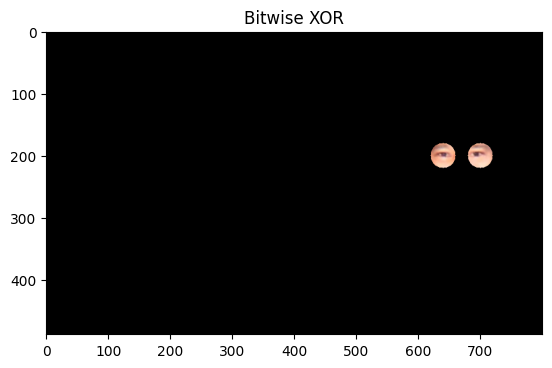

In [ ]:
# Operasi bitwise XOR
plt.imshow(cv.cvtColor(masked, cv.COLOR_BGR2RGB))
plt.title('Bitwise AND')
plt.axis('on')

(-0.5, 799.5, 487.5, -0.5)

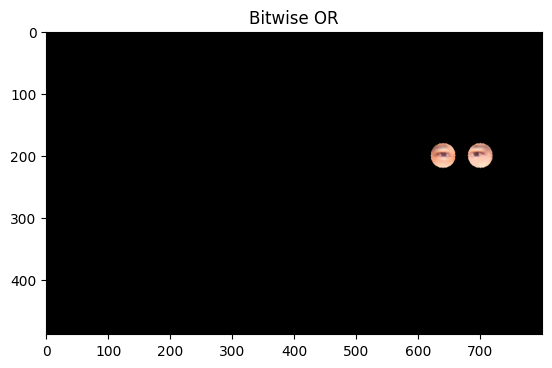

In [ ]:
# Operasi bitwise OR
plt.imshow(cv.cvtColor(bitwise_or, cv.COLOR_BGR2RGB))
plt.title('Bitwise OR')
plt.axis('on')

(-0.5, 799.5, 487.5, -0.5)

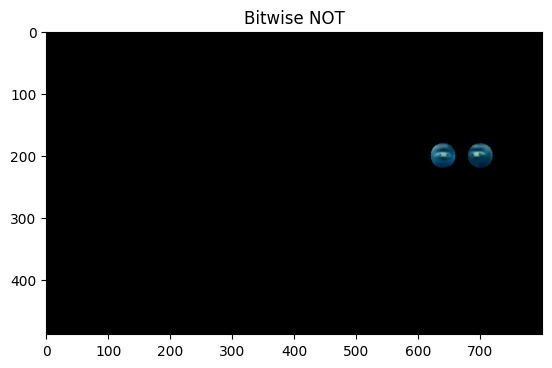

In [ ]:

# Operasi bitwise NOT
plt.imshow(cv.cvtColor(bitwise_not, cv.COLOR_BGR2RGB))
plt.title('Bitwise NOT')
plt.axis('on')

(-0.5, 799.5, 487.5, -0.5)

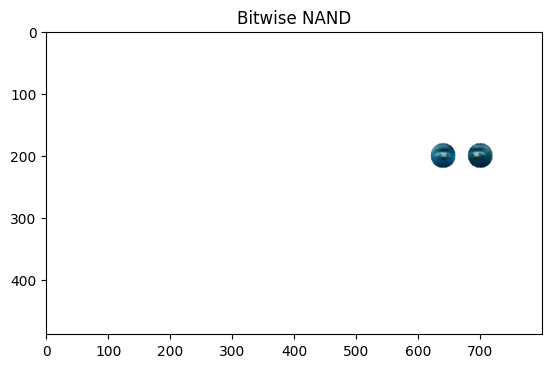

In [ ]:
# Operasi bitwise NAND
plt.imshow(cv.cvtColor(bitwise_nand, cv.COLOR_BGR2RGB))
plt.title('Bitwise NAND')
plt.axis('on')


(-0.5, 799.5, 487.5, -0.5)

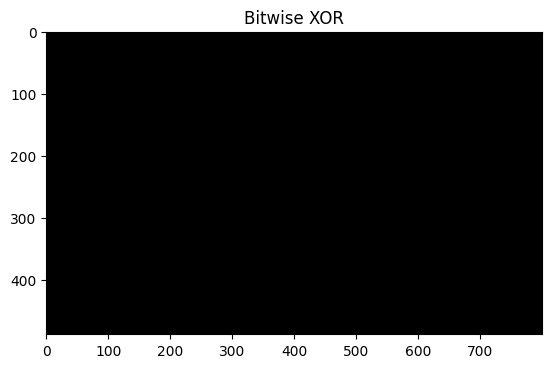

In [ ]:
# Operasi bitwise XOR
plt.imshow(cv.cvtColor(bitwise_xor, cv.COLOR_BGR2RGB))
plt.title('Bitwise XOR')
plt.axis('on')